In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [56]:
df = pd.read_csv('attacks_limpieza2 copy.csv')

## Pair Programming EDA III

Es el momento de hacer una buena exploración visual de los datos para entender un poquito mejor el dataset. Para ello trabajaremos con la librería matplotlib y seaborn.


Hipótesis

Antes de seguir, recordamos las preguntas que nos planteamos al principio del pair programming de EDA para dirigir nuestro análisis.

- ¿Es Australia es el sitio más peligroso y letal para estar relajada en la playa?

- ¿Hay diferencias entre los paises en los ataques a hombres y mujeres?

- ¿Cuáles son las edades que más sufren ataques?

- Independientemente de la edad, sufren los hombres más ataques que las mujeres?

- ¿En qué mes ocurren más ataques?

- ¿Cuál es la relación entre la especie y el tipo de ataque (si es fatal o no)?

- ¿Cómo han evolucionado los ataques a lo largo del tiempo?

De todo esto, nos damos cuenta que solo tenemos que limpiar algunas de las columnas, en concreto age, species, country, fatal, year, sex. 

Reducimos esto a una tabla para saber qué tenemos ya limpito y qué no.

 Actualizamos esta tabla ya que en el ejercicio de pair de Limpieza I y II ya dejamos algunas columnas limpitas:

Objetivos

En el ejercicio de hoy tendremos que contestar a las siguientes preguntas:

📌 Nota Como siempre, después de cada gráfica incluid una pequeña explicación de lo que nos está mostrando la gráfica.

1. Estableced el tamaño de las figuras al inicio de vuestro jupyter para que todas tengan las mismas dimensiones.

In [57]:
plt.rcParams["figure.figsize"] = (10,8)

In [58]:
df.head(2)

,case_number,year,type,country,age,species_,month,fatal,sex,species_shark,age_clean
0,1800.00.00,1800,Unprovoked,seychelles,NaN,NaN,NaN,Y,F,Unspecified,NaN
1,1797.05.28.R,1797,Unprovoked,NaN,NaN,NaN,May,Y,NaN,Unspecified,NaN


2. Manos a la obra con los plots, estos irán muy dirigidos hacia las preguntas que queremos contestar, para hacer una primera aproximación a nuestras hipótesis:

- ¿Cuántos ataques hubo por pais? 
¿Se puede ver algo claro si ploteamos todos los paises? En caso de que no, seleccionad solo los 10 paises con más ataques y volved a hacer el plot.



In [59]:
ataques_paises =pd.DataFrame(df.groupby('country')['case_number'].count())
ataques_paises.reset_index(inplace = True)
ataques_paises.head(10)

,country,case_number
0,american samoa,2
1,argentina,1
2,asia?,1
3,australia,343
4,bahamas,29
5,bahrein,1
6,barbados,3
7,belize,1
8,bermuda,4
9,between portugal & india,1


In [60]:
ataques_paises.sort_values('case_number',ascending=False,inplace = True) 
ataques_paises.head(10)

,country,case_number
91,usa,741
3,australia,343
78,south africa,234
4,bahamas,29
59,new zealand,21
69,reunion,17
10,brazil,16
66,papua new guinea,16
54,mexico,15
40,italy,11


<AxesSubplot:xlabel='country', ylabel='case_number'>

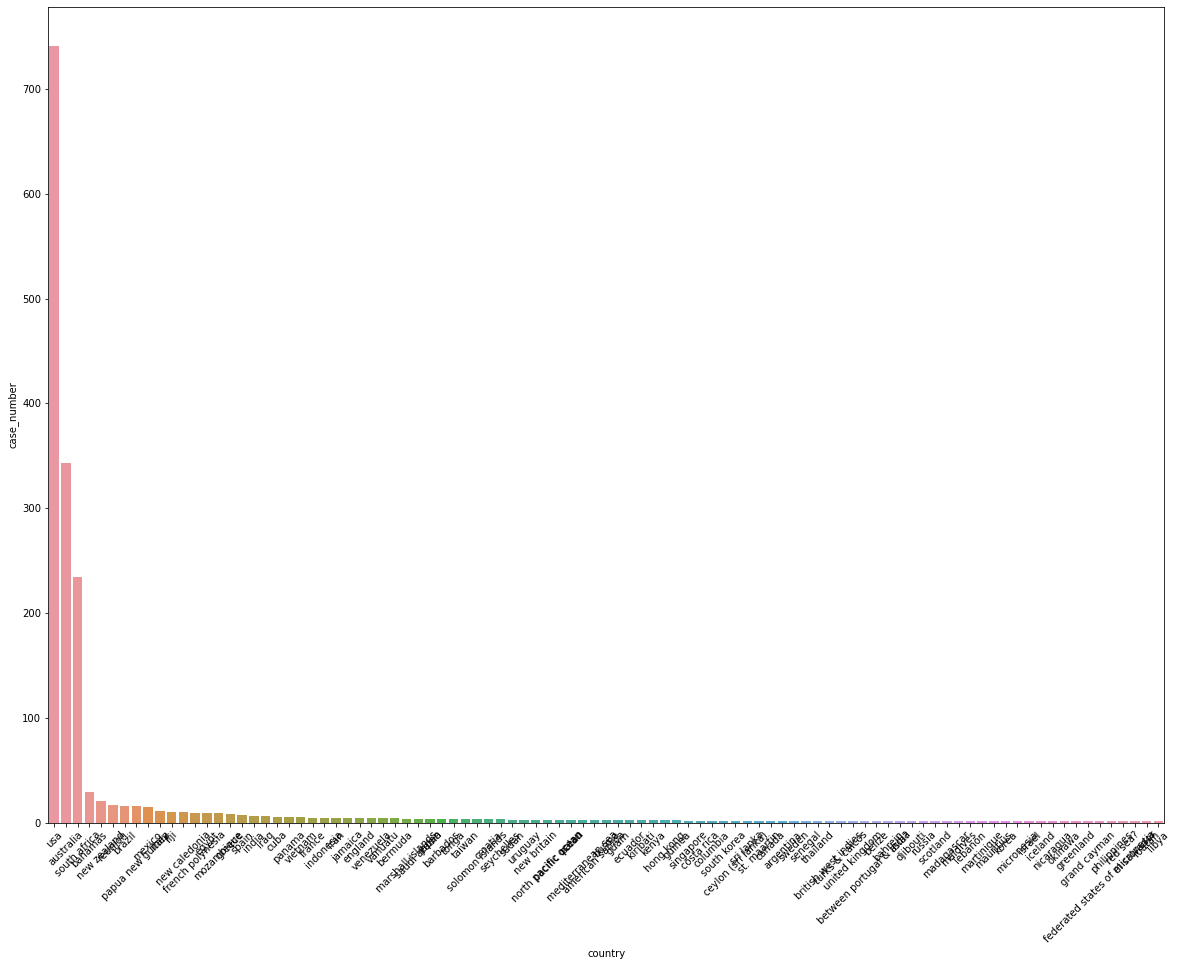

In [61]:
# Ploteamos todos los paises y no se aprecia nada claro
fig, axs =plt.subplots (figsize =(20,15))
plt.xticks( rotation =45 )
sns.barplot(x = 'country', y = 'case_number',data = ataques_paises)

No se pueden ver bien, hay demasiados países

- Usando el DataFrame de los 10 paises con más ataques, ¿hay diferencias entre sexos en esos paises?

In [63]:
ataques_paises_sex =pd.DataFrame(df.groupby(['country','sex'])['case_number'].count())
ataques_paises_sex.reset_index(inplace = True)
ataques_paises_sex.head(10)

,country,sex,case_number
0,american samoa,M,2
1,argentina,M,1
2,asia?,M,1
3,australia,F,33
4,australia,M,309
5,bahamas,F,4
6,bahamas,M,25
7,bahrein,M,1
8,barbados,M,3
9,belize,M,1


In [64]:
# Ordenamos por la columna case_number 
ataques_paises_sex.sort_values('case_number',ascending=False,inplace = True) 
ataques_paises_sex.head(10)

,country,sex,case_number
106,usa,M,609
4,australia,M,309
89,south africa,M,224
105,usa,F,131
3,australia,F,33
6,bahamas,M,25
67,new zealand,M,19
12,brazil,M,16
79,reunion,M,15
75,papua new guinea,M,13


In [65]:
ataques_paises_sex[:10]
# aplicamos la búsqueda por índice ya que previamente hemos ordenado el df por case_number con inplace = True,
# quedando el nuevo orden aplicado.

,country,sex,case_number
106,usa,M,609
4,australia,M,309
89,south africa,M,224
105,usa,F,131
3,australia,F,33
6,bahamas,M,25
67,new zealand,M,19
12,brazil,M,16
79,reunion,M,15
75,papua new guinea,M,13


<AxesSubplot:xlabel='country', ylabel='case_number'>

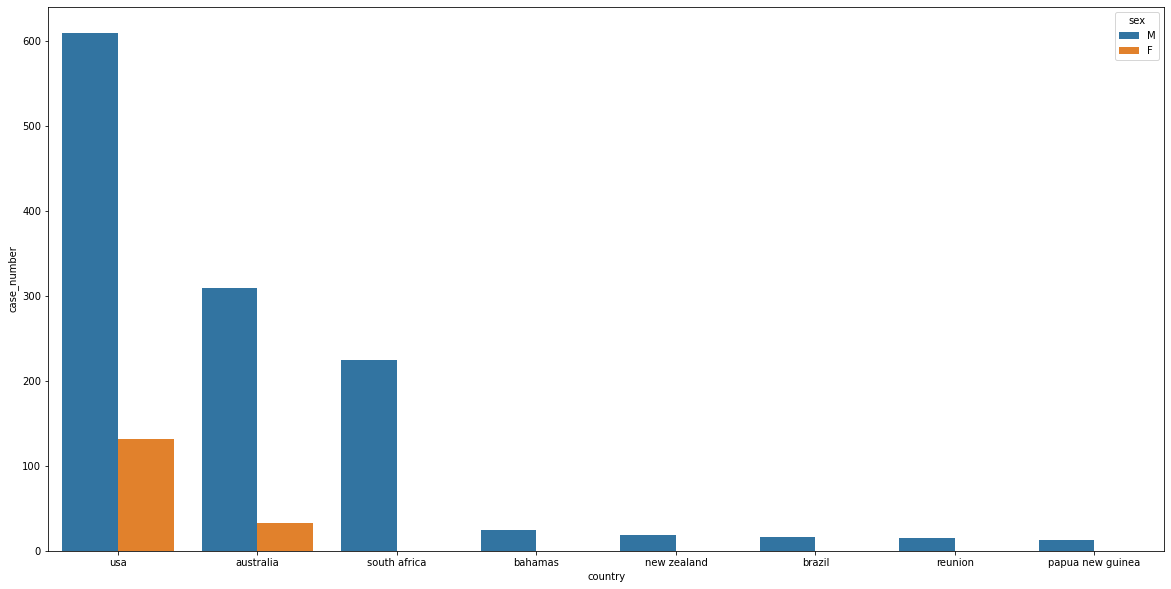

In [66]:
fig,ax = plt.subplots(figsize = (20,10))
#sns.barplot(x = 'country', y = 'case_number',data = ataques_paises[:10],hue = 'sex')
sns.barplot(x = 'country', y = 'case_number',data = ataques_paises_sex[:10],hue = 'sex')
# Hemos probado con ambos dataframes. El primero, 
# que incluye country y case number y el segundo que incluye además sex y hemos filtrado por los 10 países con mayor número de casos.
# Podemos comprobar que en el primer caso: data = ataques_paises[:10],hue=sex. 
# En el segundo caso es  data = ataques_paises_sex

In [83]:
df['age_clean']= pd.to_numeric(df['age_clean'], errors='coerce')

In [105]:
df['age']= pd.to_numeric(df['age'], errors='coerce')

In [84]:
df['age_clean'].dtypes

dtype('float64')

- ¿Qué edad recibe mayor número de ataques? 💡 Pista 💡 Para que esta gráfica nos salga legible tendremos que crear antes grupos de edad. Para hacer esto de una forma sencilla tenemos el método pd.cut() que aprendimos en la lección de Limpieza II.

In [114]:
df["edad_ataques"] = pd.cut(df["age_clean"], 3, labels = (["joven", "adulto", "mayor"]))
df.head()

,case_number,year,type,country,age,species_,month,fatal,sex,species_shark,age_clean,edad_ataques
0,1800.00.00,1800,Unprovoked,seychelles,NaN,NaN,NaN,Y,F,Unspecified,NaN,NaN
1,1797.05.28.R,1797,Unprovoked,NaN,NaN,NaN,May,Y,NaN,Unspecified,NaN,NaN
2,1792.09.12,1792,Provoked,england,NaN,NaN,Sep,Y,M,Unspecified,NaN,NaN
3,1791.00.00,1791,Unprovoked,australia,NaN,NaN,NaN,Y,F,Unspecified,NaN,NaN
4,1788.05.10,1788,Boat,australia,NaN,NaN,May,N,NaN,Unspecified,NaN,NaN


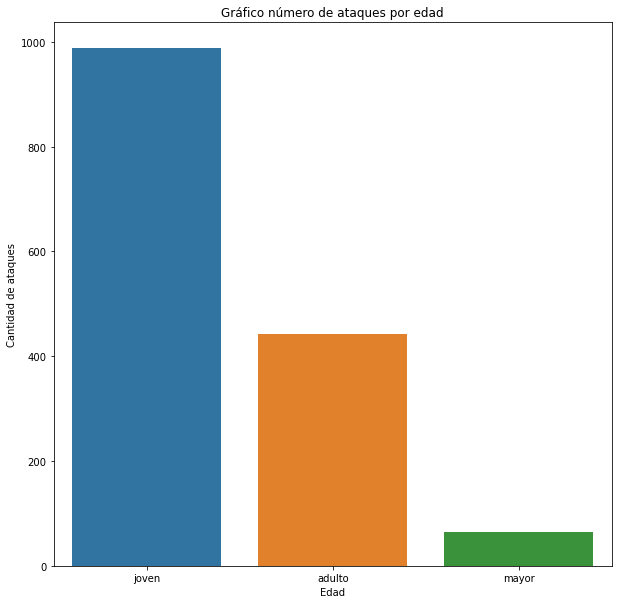

In [125]:
plt.figure  (figsize =(10,10))
fig = sns.countplot(x = 'edad_ataques', data = df)
fig.set(ylabel = 'Cantidad de ataques', xlabel ='Edad')
fig.set_title ('Gráfico número de ataques por edad')
plt.show();

- Ataques entre sexos, ¿hay diferencia?

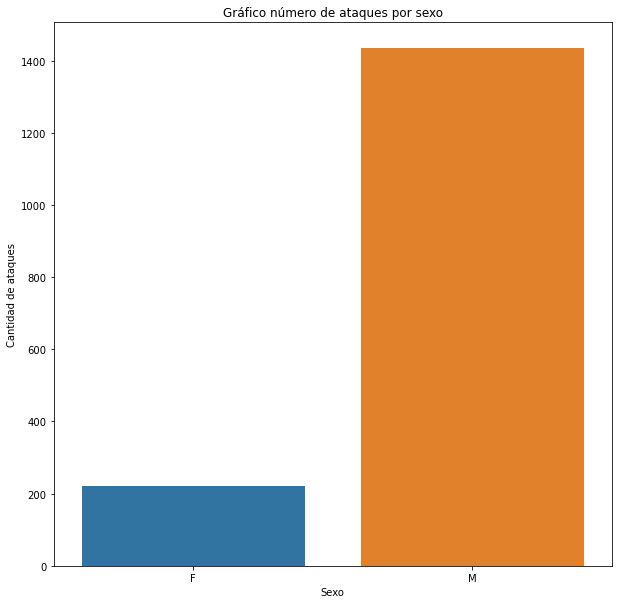

In [127]:
plt.figure  (figsize =(10,10)) 
fig = sns.countplot(x = 'sex', data = df)
fig.set(ylabel = 'Cantidad de ataques', xlabel ='Sexo')
fig.set_title ('Gráfico número de ataques por sexo')
plt.show();

Observamos que hay muchísima diferencia de ataques entre hombres y mujeres, casi siete veces mayor el número de ataques a hombres que a mujeres.


- ¿Cuando ocurren más ataques? 
¿Os sale algo raro en la gráfica?
 Intentad limpiar un poco los datos para que os salga mejor.

In [149]:
#creamos lista de meses del año para ordenar el eje x del countplot.
mes =['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

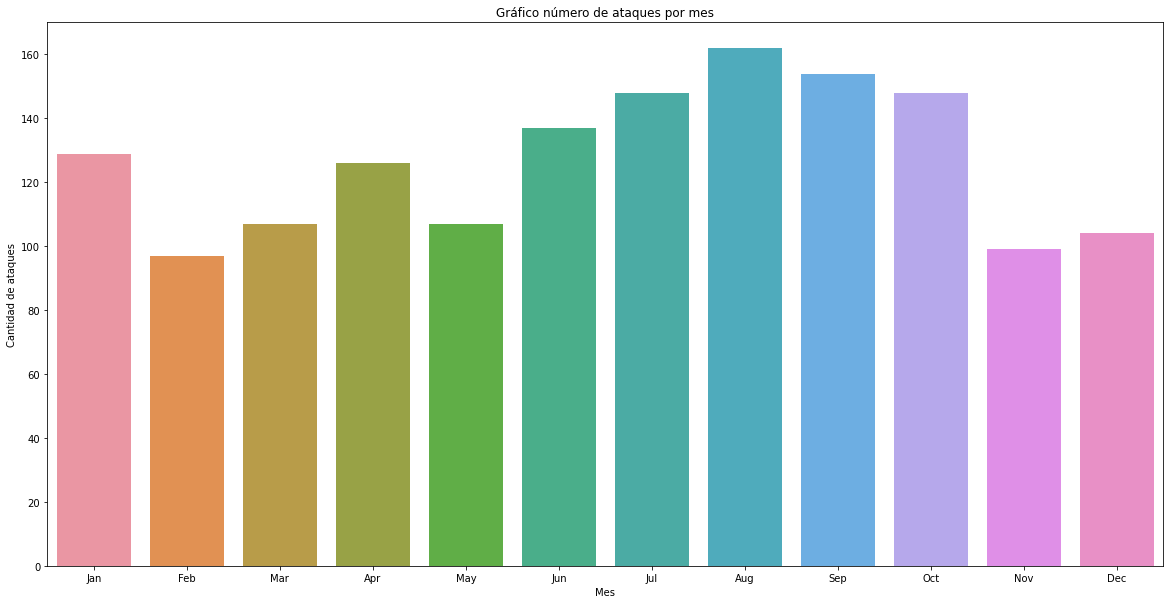

In [150]:
plt.figure  (figsize =(20,10)) 
fig = sns.countplot(x = 'month', data = df, order=mes)
fig.set(ylabel = 'Cantidad de ataques', xlabel ='Mes')
fig.set_title ('Gráfico número de ataques por mes')
plt.show();

Observamos que en el período estivaldel hemisferio Norte se produce un ligero aumento de los ataques, debido al aumento de bañistas.

In [151]:
df.to_csv('attacks_limpieza3 copy.csv')